<a href="https://colab.research.google.com/github/Jonnytan555/Data_Science/blob/main/Classifying_images_with_Tensor_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying images with Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #split the data into training and testing data

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

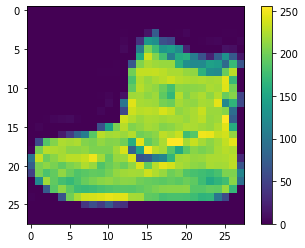

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

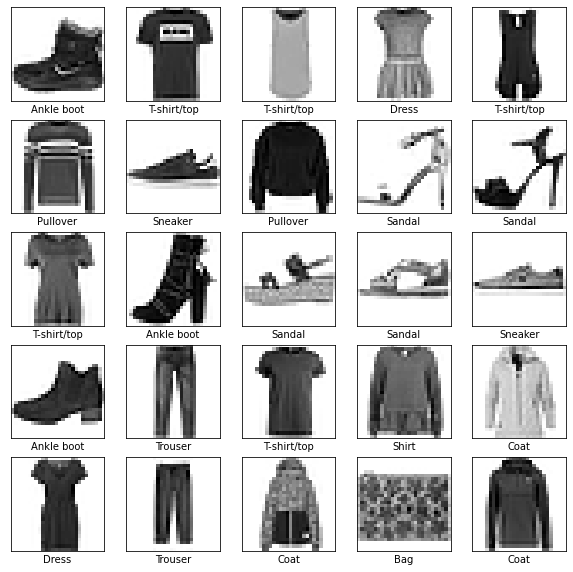

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4993 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3764 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3360 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3111 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2944 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2798 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2706 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2580 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2472 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3464 - accuracy: 0.8769

Test accuracy: 0.8769000172615051


# Making predictions

In [ ]:
prediction = model.predict(test_images)

In [ ]:
prediction #output layer 10 neurons. output of 10 different values.

array([[ -7.565942  , -15.618031  , -13.667987  , ...,   0.16657801,
         -9.231379  ,   4.1472616 ],
       [ -0.43143705, -18.97574   ,  11.751874  , ..., -24.69076   ,
        -16.860788  , -18.366571  ],
       [ -3.5888062 ,  11.785745  ,  -8.908586  , ..., -27.228916  ,
        -15.4024105 , -20.617641  ],
       ...,
       [ -6.2685843 , -16.393328  ,  -8.762609  , ..., -22.08793   ,
          3.0566716 , -23.526283  ],
       [ -6.7678566 ,   8.25352   ,  -7.7779427 , ..., -21.57999   ,
        -11.195859  , -13.832388  ],
       [ -5.009776  , -11.279504  ,  -6.291759  , ...,  -2.8265789 ,
         -5.5601134 ,  -7.31387   ]], dtype=float32)

In [ ]:
prediction[0] #all the probabilities the network calcualtes. 10 in total

array([ -7.565942  , -15.618031  , -13.667987  , -11.018428  ,
        -8.377239  ,  -3.3077862 ,  -8.602031  ,   0.16657801,
        -9.231379  ,   4.1472616 ], dtype=float32)

In [ ]:
np.argmax(prediction[0])#We will choose the highest value 

9

In [ ]:
class_names[np.argmax(prediction[0])] #value doesnt help us, need class name

'Ankle boot'

In [ ]:
#first need to show the input and the output. 
#Have to make a way to see the image 
#as well what it actually is vs what the model says it is

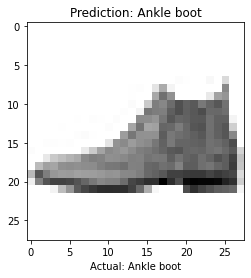

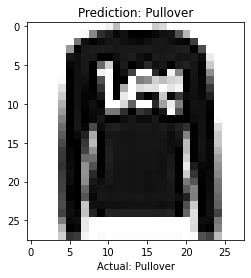

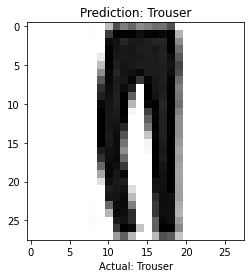

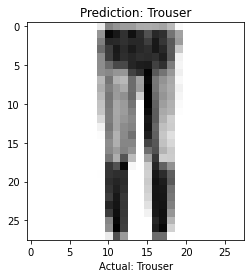

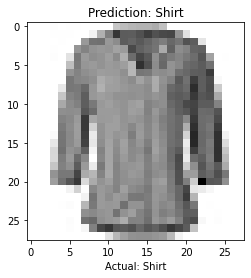

In [ ]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction: " + class_names[np.argmax(prediction[i])])
    plt.show()
    

## Predicting for one item



In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions

array([[8.03030525e-06, 2.55713672e-09, 1.79741164e-08, ...,
        1.83198843e-02, 1.51859535e-06, 9.81096327e-01],
       [5.11199096e-06, 4.51753232e-14, 9.99390006e-01, ...,
        1.48901801e-16, 3.74466761e-13, 8.30730138e-14],
       [2.10337788e-07, 9.99999762e-01, 1.02935815e-09, ...,
        1.13801623e-17, 1.55716184e-12, 8.46035481e-15],
       ...,
       [8.90884039e-05, 3.57027274e-09, 7.35665162e-06, ...,
        1.20106564e-11, 9.99375165e-01, 2.85034973e-12],
       [2.99406310e-07, 9.99912262e-01, 1.09039966e-07, ...,
        1.10517891e-13, 3.57440655e-09, 2.55961363e-10],
       [2.23556766e-03, 4.23135543e-06, 6.20339939e-04, ...,
        1.98398437e-02, 1.28937536e-03, 2.23219744e-04]], dtype=float32)

In [ ]:
predictions[0]

array([8.0303053e-06, 2.5571367e-09, 1.7974116e-08, 2.5429418e-07,
       3.5677142e-06, 5.6757807e-04, 2.8494717e-06, 1.8319884e-02,
       1.5185954e-06, 9.8109633e-01], dtype=float32)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

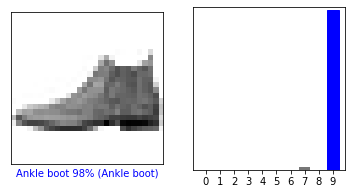

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

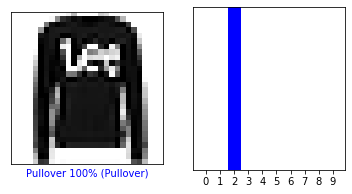

In [ ]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

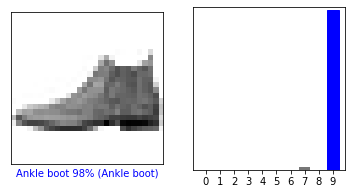

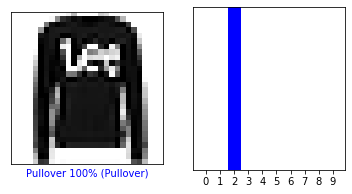

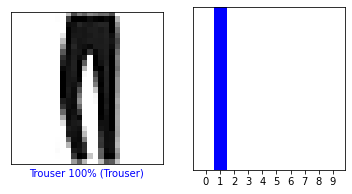

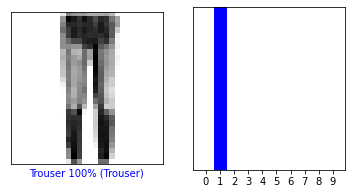

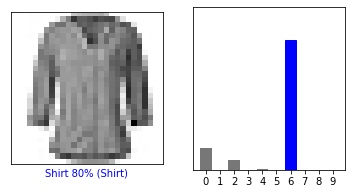

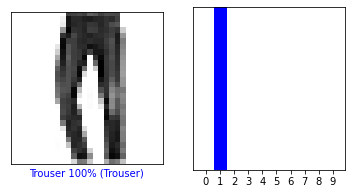

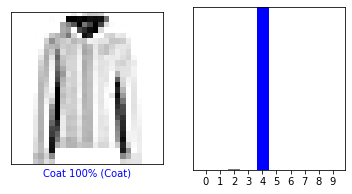

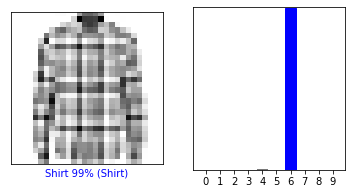

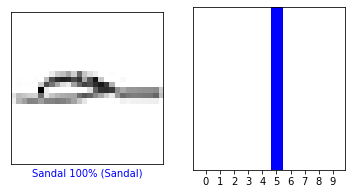

In [ ]:
for i in range(9):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()

# Excercise 2

In [ ]:
import numpy as np

import tensorflow as tf

!pip install -q tensorflow-hub
!pip install -q tfds-nightly
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

     |████████████████████████████████| 3.6MB 2.7MB/s 
Version:  2.3.0
Eager mode:  True
Hub version:  0.10.0
GPU is NOT AVAILABLE


In [ ]:
# Split the training set into 60% and 40%, so we'll end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2YE92M/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2YE92M/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2YE92M/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [ ]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 3s 87ms/step - loss: 0.8580 - accuracy: 0.5455 - val_loss: 0.7081 - val_accuracy: 0.5877
Epoch 2/20
30/30 [==============================] - 3s 85ms/step - loss: 0.6686 - accuracy: 0.6022 - val_loss: 0.6380 - val_accuracy: 0.6280
Epoch 3/20
30/30 [==============================] - 3s 85ms/step - loss: 0.6150 - accuracy: 0.6393 - val_loss: 0.5964 - val_accuracy: 0.6593
Epoch 4/20
30/30 [==============================] - 3s 86ms/step - loss: 0.5720 - accuracy: 0.6772 - val_loss: 0.5607 - val_accuracy: 0.6927
Epoch 5/20
30/30 [==============================] - 3s 84ms/step - loss: 0.5327 - accuracy: 0.7167 - val_loss: 0.5267 - val_accuracy: 0.7122
Epoch 6/20
30/30 [==============================] - 3s 84ms/step - loss: 0.4939 - accuracy: 0.7511 - val_loss: 0.4943 - val_accuracy: 0.7595
Epoch 7/20
30/30 [==============================] - 3s 85ms/step - loss: 0.4556 - accuracy: 0.7787 - val_loss: 0.4617 - val_accuracy: 0.7759
Epoch 8/20
30

In [ ]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

49/49 - 2s - loss: 0.3086 - accuracy: 0.8599
loss: 0.309
accuracy: 0.860


# Excercise 2: Text Classification with movie reviews

In [ ]:
!pip install -q tf-nightly
import tensorflow as tf

     |████████████████████████████████| 395.7MB 37kB/s 
     |████████████████████████████████| 1.3MB 37.3MB/s 
     |████████████████████████████████| 471kB 47.8MB/s 
     |████████████████████████████████| 3.8MB 46.0MB/s 
     |████████████████████████████████| 10.6MB 46.8MB/s 
     |████████████████████████████████| 14.5MB 327kB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
from tensorflow import keras

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np

print(tf.__version__)

2.3.0


In [ ]:
data = keras.datasets.imdb

In [ ]:
data

<module 'tensorflow.keras.datasets.imdb' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/imdb/__init__.py'>

In [ ]:
(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words = 10000) 
#number of word is 10,0000. theres loads of words in the dataset. This takes the 10,000 most recurrent

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0] # for review 0. Each word has been given a number. Integer encoded.

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
#must find mapping for words 
#usually creat your own website 
# tensor flow doesn this for us

word_index = imdb.get_word_index()

NameError: ignored

In [ ]:
word_index = {k:(v+3)} for k, v in word_index.items()}